In [224]:
class crossbar:
    def __init__(self,crossbar_resistivestate_matrix_input=None):
        self.selector_line_literals = None
        self.crossbar_resistivestate_matrix = self.load_crossbar(crossbar_resistivestate_matrix_input)
        
    def load_crossbar(self,crossbar_resistivestate_matrix_input=None):
        if(crossbar_resistivestate_matrix_input==None):
            print('Initiate the crossbar resistive states as input in class or function')
            return

        self.selector_line_literals = [0 for i in crossbar_resistivestate_matrix_input[0]]
        crossbar_resistivestate_matrix = crossbar_resistivestate_matrix_input
        
        # Create a directed graph
        crossbar_graph = nx.DiGraph()
        
        # Add edges to the graph (node connections)
        edges = []

        # Adding word lines
        for i in range(len(crossbar_resistivestate_matrix_input)):
            for j in range(len(crossbar_resistivestate_matrix_input[0])):
                edges.append(('WL'+str(i)+','+str(j), 'WL'+str(i)+','+str(j+1),1))  

        # Adding selector lines and Bit lines
        for i in range(len(crossbar_resistivestate_matrix_input[0])):
            for j in range(len(crossbar_resistivestate_matrix_input)):
                edges.append(('SL'+str(i)+','+str(j), 'SL'+str(i)+','+str(j+1),1))
                edges.append(('BL'+str(i)+','+str(j), 'BL'+str(i)+','+str(j+1),1))

                # Adding transistors
                edges.append(('SL'+str(i)+','+str(j), 'Transistor'+str(i)+','+str(j),1)) #for controlling transistor based on the literal value
                
                edges.append(('WL'+str(j)+','+str(i), 'Transistor'+str(i)+','+str(j),1))
                edges.append(('Transistor'+str(i)+','+str(j), 'WL'+str(j)+','+str(i),1))
                
                edges.append(('Transistor'+str(i)+','+str(j), 'Memristor'+str(i)+','+str(j),1))
                edges.append(('Memristor'+str(i)+','+str(j), 'Transistor'+str(i)+','+str(j),1))
                
                edges.append(('Memristor'+str(i)+','+str(j), 'BL'+str(i)+','+str(j),1))
                edges.append(('BL'+str(i)+','+str(j), 'Memristor'+str(i)+','+str(j),1))

        
        
        crossbar_graph.add_edges_from([(u, v, {'capacity': cap}) for u, v, cap in edges])

        # Define node positions for visualization (optional for better graph layout)
        pos = nx.spring_layout(crossbar_graph)

        pos = {}

        # Wordlines (horizontal, from left to right, stacked vertically)
        for i in range(len(crossbar_resistivestate_matrix_input)):
            for j in range(len(crossbar_resistivestate_matrix_input[0])+1):
                pos[f'WL{i},{j}'] = (j, -i)  # Horizontally from left to right, stacked vertically
        
        # Selector lines (vertical, from top to bottom, stacked horizontally)
        for i in range(len(crossbar_resistivestate_matrix_input[0])):
            for j in range(len(crossbar_resistivestate_matrix_input)+1):
                pos[f'SL{j},{i}'] = (i + len(crossbar_resistivestate_matrix_input[0]) + 2, -j)  # Offset horizontally to right
        
        # Bitlines (vertical, from top to bottom, stacked horizontally next to selector lines)
        for i in range(len(crossbar_resistivestate_matrix_input[0])):
            for j in range(len(crossbar_resistivestate_matrix_input)+1):
                pos[f'BL{j},{i}'] = (i + len(crossbar_resistivestate_matrix_input[0]) + 5, -j)  # Offset horizontally further right

        for i in range(len(crossbar_resistivestate_matrix_input[0])):
            for j in range(len(crossbar_resistivestate_matrix_input)):
                pos[f'Transistor{i},{j}'] = (j + 0.5, -i - 0.5)  # Place transistors slightly below and to the right of their connections
                pos[f'Memristor{i},{j}'] = (j + 1, -i - 1)  # Place memristors below the transistors
                
        print(pos)
        
        # Visualize the graph
        self.visualize_graph(crossbar_graph, pos)

        
        self.crossbar_resistivestate_matrix = crossbar_resistivestate_matrix
        return crossbar_resistivestate_matrix

    # Visualize the graph using Matplotlib and NetworkX
    def visualize_graph(self, G, pos):
        plt.figure(figsize=(12, 8))

        # Filter nodes that have positions defined in pos
        nodes_with_pos = {node: pos[node] for node in G.nodes if node in pos}

        # Draw the graph with only the nodes that have defined positions
        nx.draw(G, nodes_with_pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight='bold', arrows=True)

        # Add edge labels (capacity)
        edge_labels = {(u, v): f'{d["capacity"]}' for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.show()

    def evaluate_crossbar(self, literals_input):
        if(len(literals_input)!=len(self.selector_line_literals)):
            print("length of literal wrong")
            return
        if(self.crossbar_resistivestate_matrix==None):
            print('Initiate the crossbar resistive states as input in class or function')
            return

        self.selector_line_literals = literals_input
        crossbar_evaluation = [[0 for i in self.crossbar_resistivestate_matrix] for j in self.crossbar_resistivestate_matrix[0]]
        for i,row in enumerate(self.crossbar_resistivestate_matrix):
            for j,val in enumerate(row):
                crossbar_evaluation[i][j]=[self.selector_line_literals[j],self.crossbar_resistivestate_matrix[i][j]]
        return crossbar_evaluation

<h1>Boolean Expresions</h1><h2>
cout = (a0 ∧ b0) ∨ (a0 ∧ cin) ∨ (b0 ∧ cin) <br>
s0 = a0 ⊕ b0 ⊕ cin
</h2>

Initiate the crossbar resistive states as input in class or function
{'WL0,0': (0, 0), 'WL0,1': (1, 0), 'WL0,2': (2, 0), 'WL0,3': (3, 0), 'WL0,4': (4, 0), 'WL1,0': (0, -1), 'WL1,1': (1, -1), 'WL1,2': (2, -1), 'WL1,3': (3, -1), 'WL1,4': (4, -1), 'WL2,0': (0, -2), 'WL2,1': (1, -2), 'WL2,2': (2, -2), 'WL2,3': (3, -2), 'WL2,4': (4, -2), 'SL0,0': (6, 0), 'SL1,0': (6, -1), 'SL2,0': (6, -2), 'SL3,0': (6, -3), 'SL0,1': (7, 0), 'SL1,1': (7, -1), 'SL2,1': (7, -2), 'SL3,1': (7, -3), 'SL0,2': (8, 0), 'SL1,2': (8, -1), 'SL2,2': (8, -2), 'SL3,2': (8, -3), 'SL0,3': (9, 0), 'SL1,3': (9, -1), 'SL2,3': (9, -2), 'SL3,3': (9, -3), 'BL0,0': (9, 0), 'BL1,0': (9, -1), 'BL2,0': (9, -2), 'BL3,0': (9, -3), 'BL0,1': (10, 0), 'BL1,1': (10, -1), 'BL2,1': (10, -2), 'BL3,1': (10, -3), 'BL0,2': (11, 0), 'BL1,2': (11, -1), 'BL2,2': (11, -2), 'BL3,2': (11, -3), 'BL0,3': (12, 0), 'BL1,3': (12, -1), 'BL2,3': (12, -2), 'BL3,3': (12, -3), 'Transistor0,0': (0.5, -0.5), 'Memristor0,0': (1, -1), 'Transistor0,1': (1.5, -0.5), 

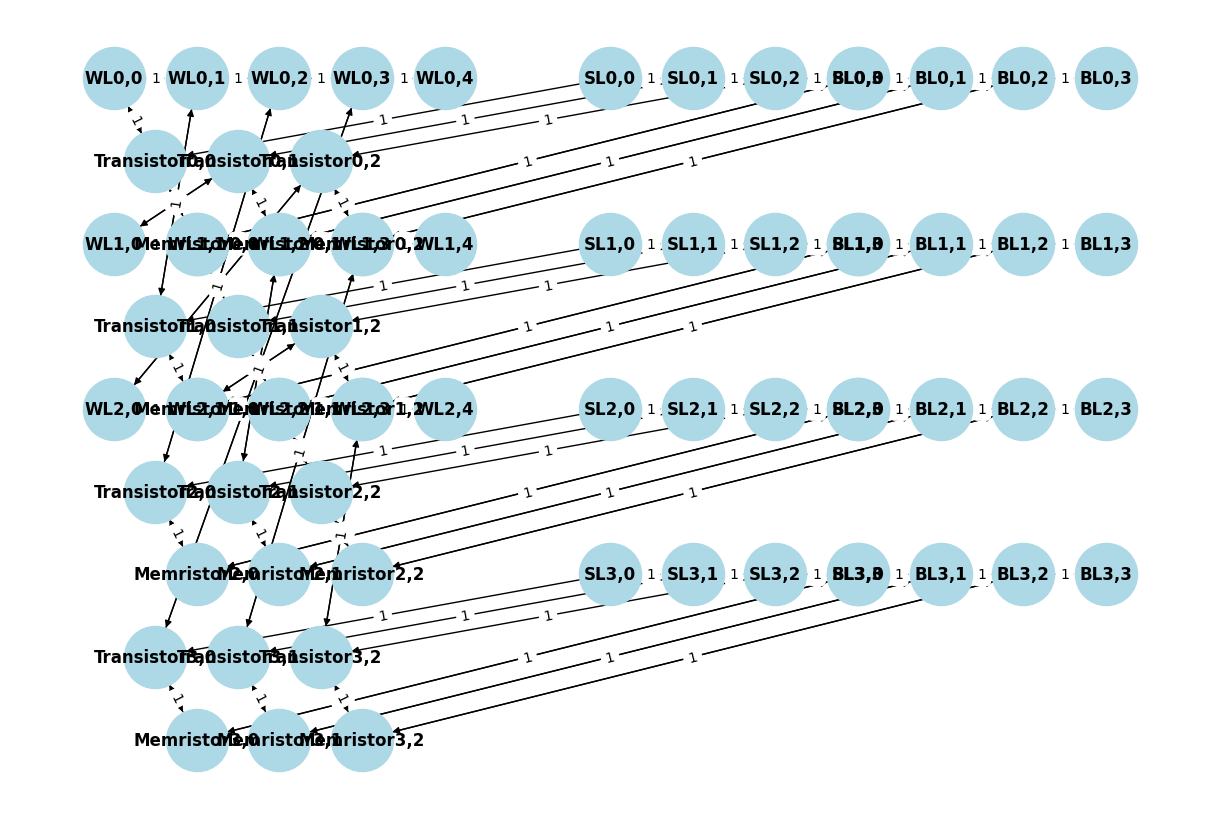

[[1, 1, 0, 0], [0, 1, 1, 1], [1, 0, 1, 1]]

In [225]:
crossbar_resistivestate_matrix1 = [
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1]
]

crossbar_resistivestate_matrix1 = [
    [1, 1, 0, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 1],
]

a=crossbar()
a.load_crossbar(crossbar_resistivestate_matrix1)

In [85]:
a.evaluate_crossbar([1, 1, 1,0])

[[[1, 1], [1, 1], [1, 0]], [[1, 0], [1, 1], [1, 1]], [[1, 1], [1, 0], [1, 1]]]

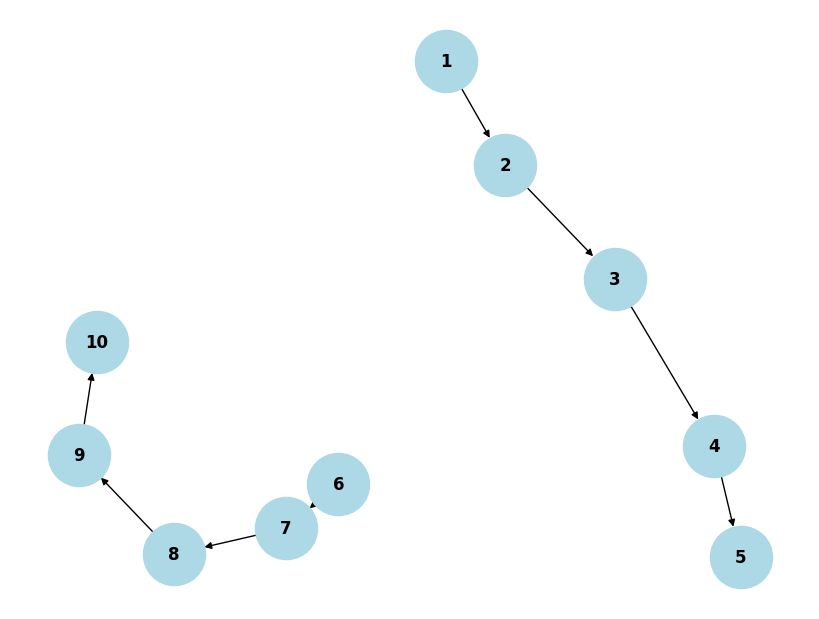

BFS Order: ['1', '2', '3', '4', '5']
DFS Order: ['1', '2', '3', '4', '5']


In [57]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph (node connections)
edges = [('1', '2'), ('2', '3'), ('3', '4'), ('4', '5'), 
         ('6', '7'), ('7', '8'), ('8', '9'), ('9', '10')]

G.add_edges_from(edges)

# Function to visualize the graph
def visualize_graph(G, pos):
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight='bold', arrows=True)
    plt.show()

# BFS Algorithm
def bfs(G, start_node):
    visited = set()
    queue = deque([start_node])
    bfs_order = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            bfs_order.append(node)
            # Add all neighbors to the queue
            for neighbor in G.neighbors(node):
                if neighbor not in visited:
                    queue.append(neighbor)

    return bfs_order

# DFS Algorithm
def dfs(G, start_node, visited=None, dfs_order=None):
    if visited is None:
        visited = set()
    if dfs_order is None:
        dfs_order = []

    visited.add(start_node)
    dfs_order.append(start_node)

    # Visit all the neighbors
    for neighbor in G.neighbors(start_node):
        if neighbor not in visited:
            dfs(G, neighbor, visited, dfs_order)

    return dfs_order

# Define node positions for visualization (optional for better graph layout)
pos = nx.spring_layout(G)

# Visualize the graph
visualize_graph(G, pos)

# Run BFS and DFS
bfs_result = bfs(G, '1')
dfs_result = dfs(G, '1')

# Print the traversal orders
print("BFS Order:", bfs_result)
print("DFS Order:", dfs_result)


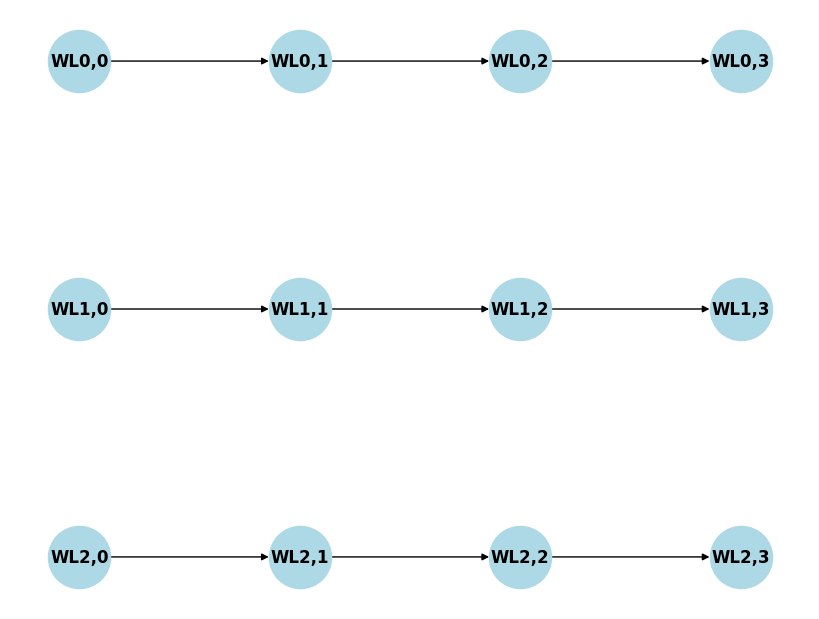

In [88]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph (node connections)
edges = [('WL0,0', 'WL0,1'), ('WL0,1', 'WL0,2'), ('WL0,2', 'WL0,3'),
         ('WL1,0', 'WL1,1'), ('WL1,1', 'WL1,2'), ('WL1,2', 'WL1,3'),
         ('WL2,0', 'WL2,1'), ('WL2,1', 'WL2,2'), ('WL2,2', 'WL2,3')]

G.add_edges_from(edges)

# Define grid layout for visualization
pos = {
    'WL0,0': (0, 2),
    'WL0,1': (1, 2),
    'WL0,2': (2, 2),
    'WL0,3': (3, 2),
    'WL1,0': (0, 1),
    'WL1,1': (1, 1),
    'WL1,2': (2, 1),
    'WL1,3': (3, 1),
    'WL2,0': (0, 0),
    'WL2,1': (1, 0),
    'WL2,2': (2, 0),
    'WL2,3': (3, 0),
}

# Visualize the graph in a grid format
def visualize_graph(G, pos):
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight='bold', arrows=True)
    plt.show()

# Visualize the graph
visualize_graph(G, pos)


NetworkXError: Node 'WL0,4' has no position.

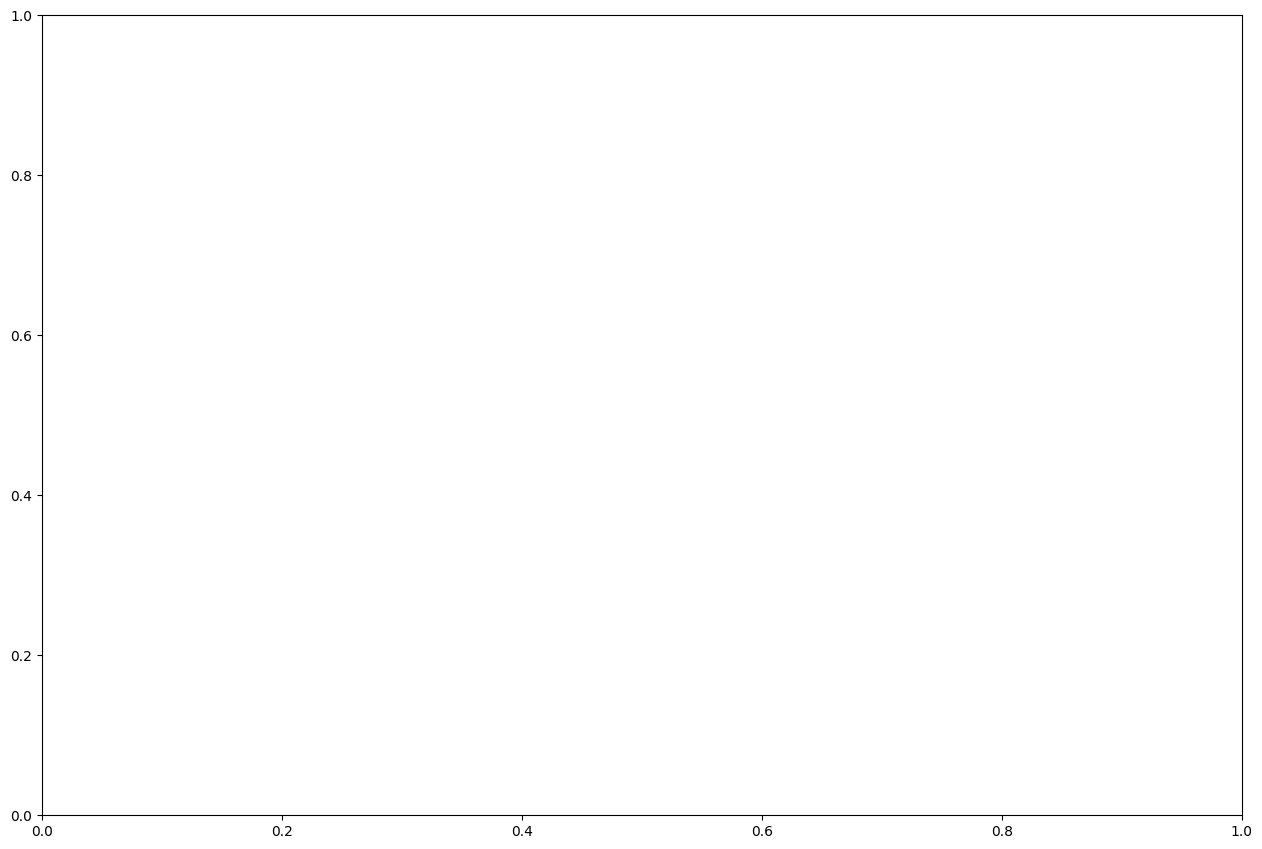

In [193]:
import networkx as nx
import matplotlib.pyplot as plt

class crossbar:
    def __init__(self, crossbar_resistivestate_matrix_input=None):
        self.selector_line_literals = None
        self.crossbar_resistivestate_matrix = self.load_crossbar(crossbar_resistivestate_matrix_input)
        
    def load_crossbar(self, crossbar_resistivestate_matrix_input=None):
        if crossbar_resistivestate_matrix_input is None:
            print('Initiate the crossbar resistive states as input in class or function')
            return

        self.selector_line_literals = [0 for _ in crossbar_resistivestate_matrix_input[0]]
        crossbar_resistivestate_matrix = crossbar_resistivestate_matrix_input
        
        # Create a directed graph
        crossbar_graph = nx.DiGraph()
        
        # Add edges to the graph (node connections)
        edges = []

        # Adding word lines
        for i in range(len(crossbar_resistivestate_matrix_input)):
            for j in range(len(crossbar_resistivestate_matrix_input[0])):
                edges.append(('WL'+str(i)+','+str(j), 'WL'+str(i)+','+str(j+1)))  

        # Adding selector lines and Bit lines (turned 90 degrees)
        for i in range(len(crossbar_resistivestate_matrix_input[0])):
            for j in range(len(crossbar_resistivestate_matrix_input)):
                edges.append(('SL'+str(i)+','+str(j), 'SL'+str(i)+','+str(j+1)))
                edges.append(('BL'+str(i)+','+str(j), 'BL'+str(i)+','+str(j+1)))

                # Adding transistors
                edges.append(('SL'+str(i)+','+str(j), 'Transistor'+str(i)+','+str(j))) #for controlling transistor based on the literal value
                
                edges.append(('WL'+str(i)+','+str(j), 'Transistor'+str(i)+','+str(j)))
                edges.append(('Transistor'+str(i)+','+str(j), 'WL'+str(i)+','+str(j)))
                
                edges.append(('Transistor'+str(i)+','+str(j), 'Memristor'+str(i)+','+str(j)))
                edges.append(('Memristor'+str(i)+','+str(j), 'Transistor'+str(i)+','+str(j)))
                
                edges.append(('Memristor'+str(i)+','+str(j), 'BL'+str(i)+','+str(j)))
        
        crossbar_graph.add_edges_from(edges)

        # Define positions for the graph layout
        pos = {}

        # Wordlines (horizontal, from left to right, stacked vertically)
        for i in range(len(crossbar_resistivestate_matrix_input)):
            for j in range(len(crossbar_resistivestate_matrix_input[0])):
                pos[f'WL{i},{j}'] = (j, -i)  # Horizontally from left to right, stacked vertically
        
        # Selector lines (vertical, from top to bottom, stacked horizontally)
        for i in range(len(crossbar_resistivestate_matrix_input[0])):
            for j in range(len(crossbar_resistivestate_matrix_input)):
                pos[f'SL{j},{i}'] = (i + len(crossbar_resistivestate_matrix_input[0]) + 2, -j)  # Offset horizontally to right
        
        # Bitlines (vertical, from top to bottom, stacked horizontally next to selector lines)
        for i in range(len(crossbar_resistivestate_matrix_input[0])):
            for j in range(len(crossbar_resistivestate_matrix_input)):
                pos[f'BL{j},{i}'] = (i + len(crossbar_resistivestate_matrix_input[0]) + 5, -j)  # Offset horizontally further right

        # Visualize the graph
        self.visualize_graph(crossbar_graph, pos)

        self.crossbar_resistivestate_matrix = crossbar_resistivestate_matrix
        return crossbar_resistivestate_matrix

    def evaluate_crossbar(self, literals_input):
        if len(literals_input) != len(self.selector_line_literals):
            print("Length of literal is wrong")
            return
        if self.crossbar_resistivestate_matrix is None:
            print('Initiate the crossbar resistive states as input in class or function')
            return

        self.selector_line_literals = literals_input
        crossbar_evaluation = [[0 for _ in self.crossbar_resistivestate_matrix[0]] for _ in self.crossbar_resistivestate_matrix]
        for i, row in enumerate(self.crossbar_resistivestate_matrix):
            for j, val in enumerate(row):
                crossbar_evaluation[i][j] = [self.selector_line_literals[j], self.crossbar_resistivestate_matrix[i][j]]
        return crossbar_evaluation

    # Visualize the graph using Matplotlib and NetworkX
    def visualize_graph(self, G, pos):
        plt.figure(figsize=(12, 8))

        # Filter nodes that have positions defined in pos
        nodes_with_pos = {node: pos[node] for node in G.nodes if node in pos}

        # Draw the graph with only the nodes that have defined positions
        nx.draw(G, nodes_with_pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight='bold', arrows=True)

        plt.show()


# Example crossbar resistive state matrix
crossbar_resistivestate_matrix1 = [
    [1, 1, 0, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 1],
]

# Create crossbar object
cb = crossbar(crossbar_resistivestate_matrix_input=crossbar_resistivestate_matrix1)

# Evaluate the crossbar with literals input
evaluation_result = cb.evaluate_crossbar([1, 0, 1, 1])
print("Crossbar Evaluation Result:")
print(evaluation_result)
